In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='pastel')

Importing essential libraries



In [2]:
import pandas as pd
import csv

df = pd.read_csv(
    "/content/netflix_titles.csv",
    on_bad_lines='skip',
    quoting=csv.QUOTE_MINIMAL
)




In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [6]:
print(f"Shape: {df.shape}")


Shape: (8807, 12)


Data cleaning

In [7]:
#deleting a Duplicates

df.drop_duplicates(inplace=True)


In [8]:
#Handling missing values ​​
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)



/tmp/ipython-input-3622271048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3622271048.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [9]:
# Convert date to appropriate format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [10]:
# Extract year added from date_added
df['year_added'] = df['date_added'].dt.year



In [11]:
# Check after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


EDA

Content type Distribution

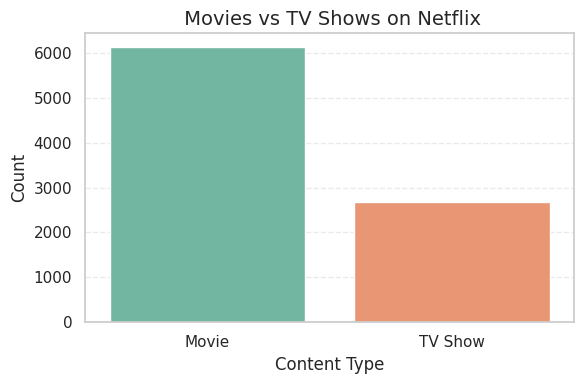

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='type',
    hue='type',
    palette='Set2',
    legend=False
)
plt.title(' Movies vs TV Shows on Netflix', fontsize=14)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



Number of issues by year

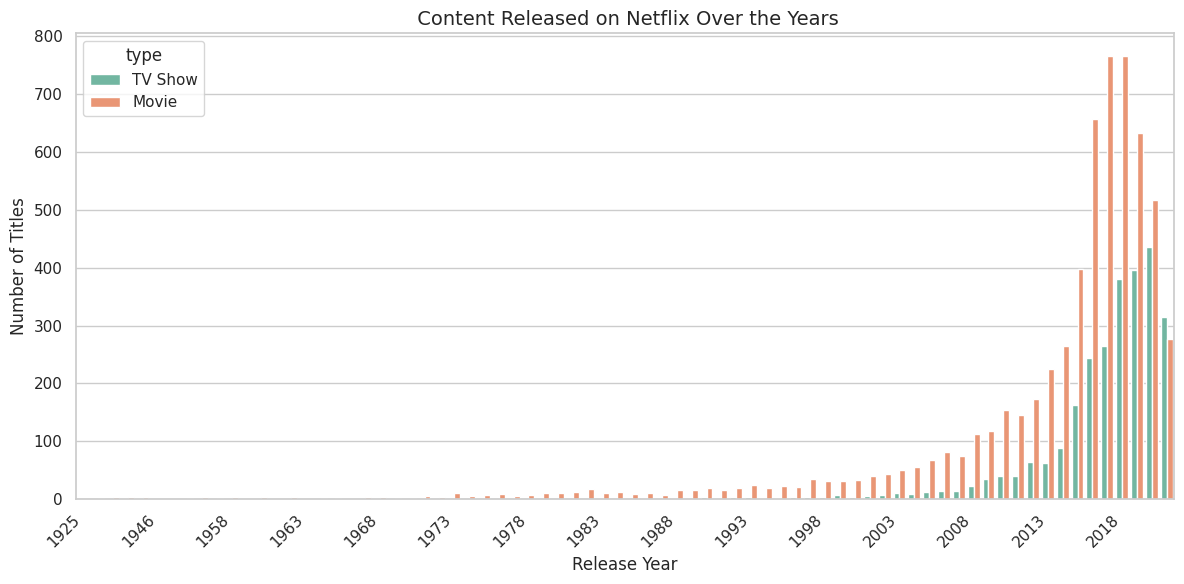

In [13]:
plt.figure(figsize=(12,6))


years_order = sorted(df['release_year'].dropna().unique())

sns.countplot(
    data=df,
    x='release_year',
    hue='type',
    order=years_order,
    palette='Set2'
)


plt.xticks(rotation=45, ha='right')


for ind, label in enumerate(plt.gca().get_xticklabels()):
    if ind % 5 != 0:
        label.set_visible(False)

plt.title(' Content Released on Netflix Over the Years', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')

plt.tight_layout()
plt.show()



The most productive countries

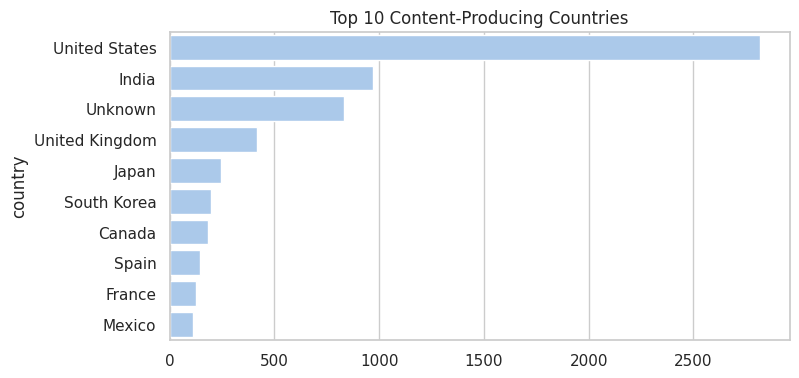

In [14]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Content-Producing Countries')
plt.show()


Most popular age groups

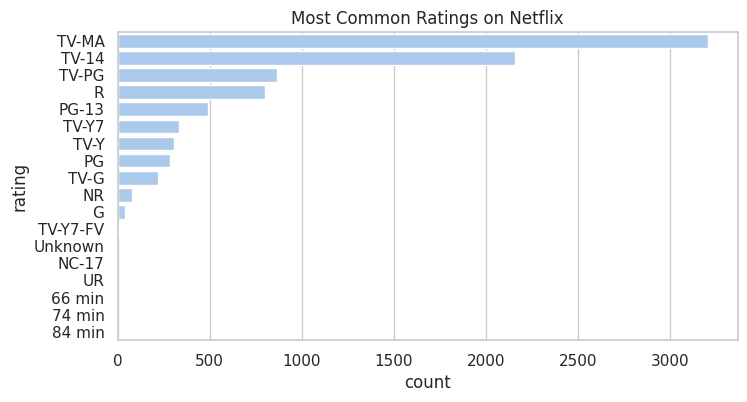

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Most Common Ratings on Netflix')
plt.show()


Most common types (listed_in)

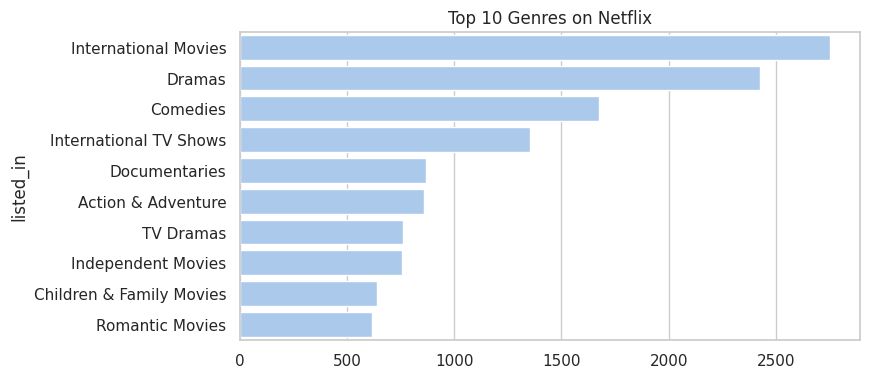

In [16]:
genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.show()


Analyzing the relationship between content type and age classification

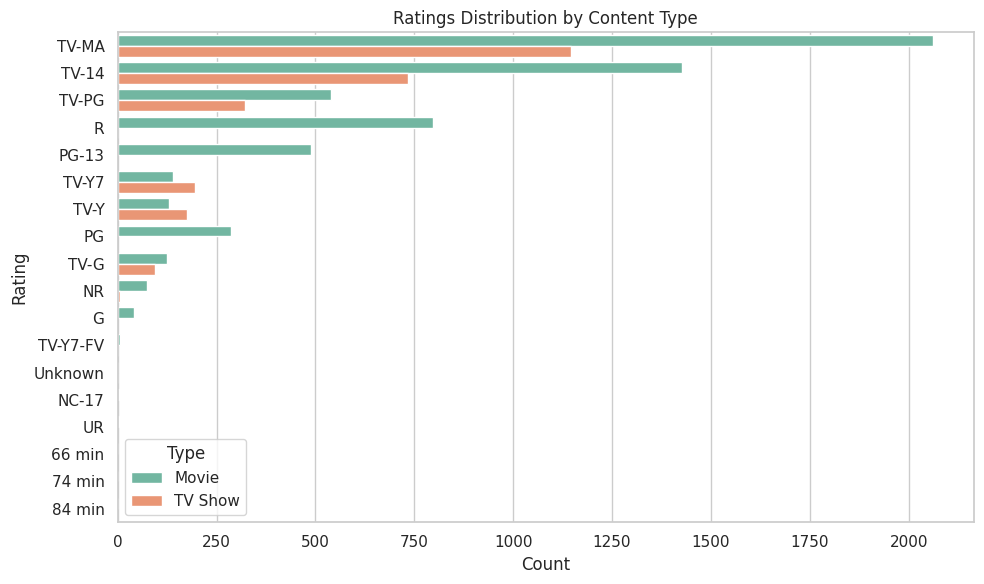

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating', hue='type', order=df['rating'].value_counts().index, palette='Set2')
plt.title('Ratings Distribution by Content Type')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


Timeline analysis of producing countries

In [24]:
top_countries = df['country'].value_counts().head(5).index
df_top = df[df['country'].isin(top_countries)]


This is the timeline Analysis of the Top 5 Content-Producing Countries (2000–2021)

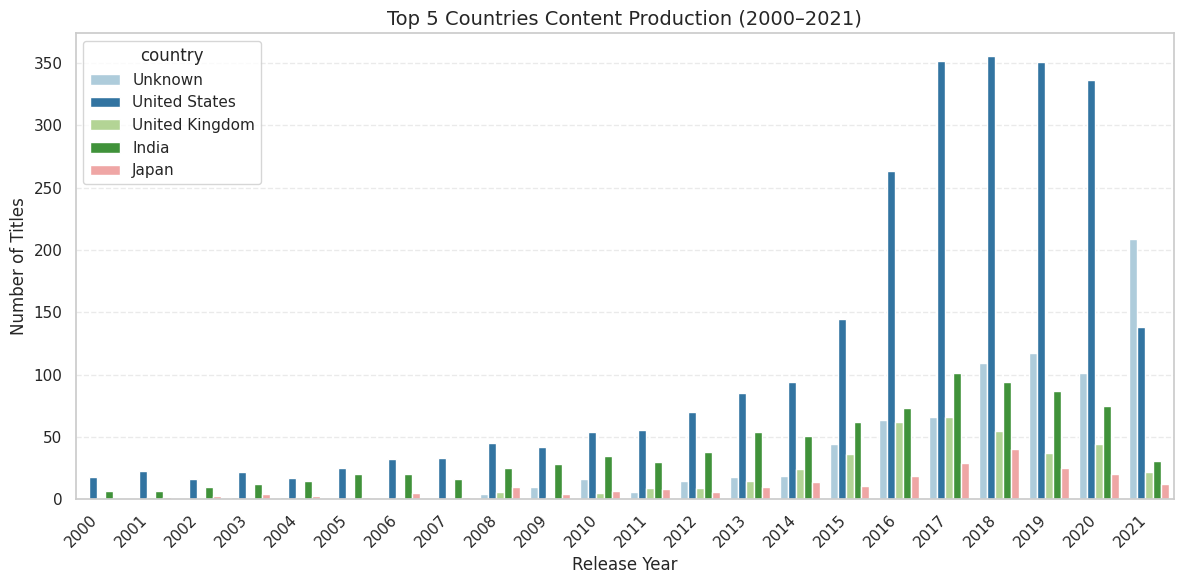

In [25]:
plt.figure(figsize=(12,6))
df_recent = df_top[df_top['release_year'] >= 2000]

sns.countplot(
    data=df_recent,
    x='release_year',
    hue='country',
    order=sorted(df_recent['release_year'].unique()),
    palette='Paired'
)

plt.title('Top 5 Countries Content Production (2000–2021)', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
